In [1]:
import numpy as np
import pandas as pd
from near_corr_mat.functions import *

In [2]:
ERR_MAX = 1e-6
ITE_MAX = 10000

# Von Neumann alternative projection for the primal

In [3]:
def update_neumann(version, prim_2):
    if version == 0:
        prim_1 = proj_cone(prim_2)
        updated = (prim_1, proj_unit_diag(prim_1))
    elif version == 1:
        prim_1 = proj_unit_diag(prim_2)
        updated = (prim_1, proj_cone(prim_1))
    return updated

In [4]:
def proj_neumann(mat, version, err_max=1e-6, ite_max=10_000):
    err = err_max + 1
    ite = 0
    prim_2 = mat.copy()
    errors = list()
    while err > err_max and ite < ite_max:
        prim_1, prim_2 = update_neumann(version, prim_2)
        err = norm(prim_1 - prim_2)
        errors.append(err)
        ite += 1
    return 0.5 * (prim_1 + prim_2), errors

CPU times: user 133 ms, sys: 11.3 ms, total: 145 ms
Wall time: 142 ms


<AxesSubplot:>

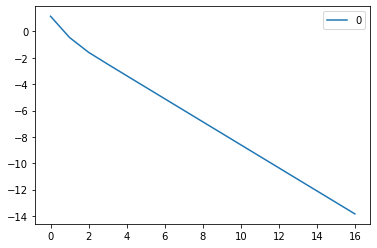

In [5]:
%%time
projection, errors = proj_neumann(laplace, 0, ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 8.95 s, sys: 38.1 s, total: 47.1 s
Wall time: 2.96 s


(0.0, 2.0)

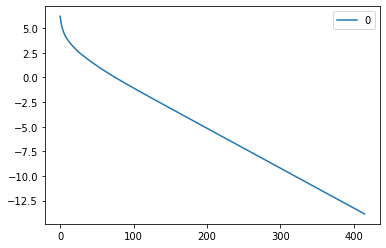

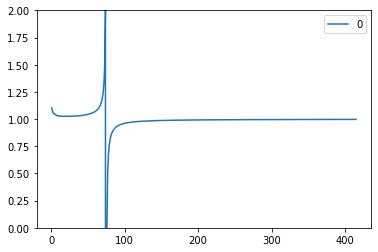

In [6]:
%%time
mat = gen_sym_psd(100, 10, 50)
projection, errors = proj_neumann(mat, 0, ERR_MAX, ITE_MAX)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [7]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = proj_neumann(mat, 0, ERR_MAX, ITE_MAX)

3.65 s ± 344 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


CPU times: user 92.3 ms, sys: 499 ms, total: 592 ms
Wall time: 38.7 ms


<AxesSubplot:>

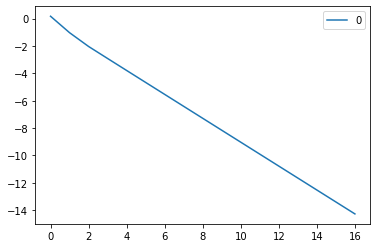

In [8]:
%%time
projection, errors = proj_neumann(laplace, 1, ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 11.2 s, sys: 50 s, total: 1min 1s
Wall time: 3.9 s


(0.0, 2.0)

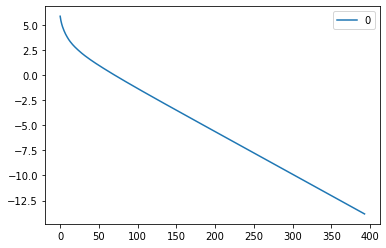

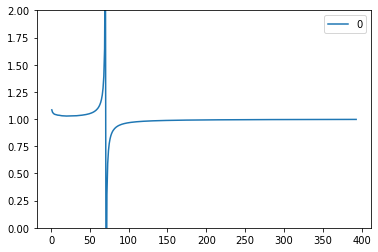

In [9]:
%%time
mat = gen_sym_psd(100, 11, 50)
projection, errors = proj_neumann(mat, 1, ERR_MAX, ITE_MAX)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [10]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = proj_neumann(mat, 1, ERR_MAX, ITE_MAX)

3.94 s ± 566 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Classical Dykstra's projection algorithm for the primal does not converge

In [11]:
def update_dykstra(version, prim_2, dual):
    if version == 0:
        prim_1 = proj_cone(prim_2 - dual)
        updated = (prim_1, proj_unit_diag(prim_1 + dual))
    elif version == 1:
        prim_1 = proj_unit_diag(prim_2 - dual)
        updated = (prim_1, proj_cone(prim_1 + dual))
    return updated

In [12]:
def proj_dykstra(mat, version, err_max=1e-6, ite_max=10_000):
    err = err_max + 1
    ite = 0
    prim_2 = mat.copy()
    dual = np.zeros(mat.shape)
    errors = list()
    while err > err_max and ite < ite_max:
        prim_1, prim_2_new = update_dykstra(version, prim_2, dual)
        dual = dual + prim_1 - prim_2_new
        err = norm(prim_1 - prim_2_new)
        errors.append(err)

        prim_2 = prim_2_new.copy()
        ite += 1
    return 0.5 * (prim_1 + prim_2), errors

<AxesSubplot:>

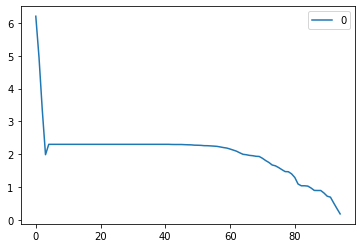

In [13]:
mat = gen_sym_psd(100, 12, 50)
projection, errors = proj_dykstra(mat, 0, ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

<AxesSubplot:>

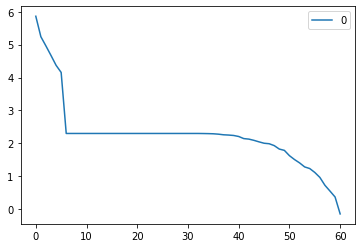

In [14]:
mat = gen_sym_psd(100, None, 50)
projection, errors = proj_dykstra(mat, 1, ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

# Modified Dykstra's projection for the primal

CPU times: user 21 ms, sys: 5.1 ms, total: 26.1 ms
Wall time: 21.1 ms


<AxesSubplot:>

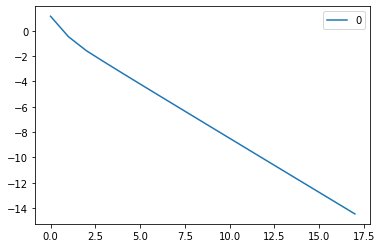

In [15]:
%%time
projection, errors = nearest_corr(
    laplace, 'grad', ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 57.2 s, sys: 3min 57s, total: 4min 54s
Wall time: 18.5 s


(0.0, 2.0)

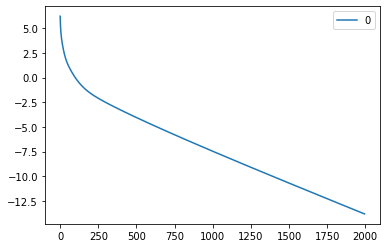

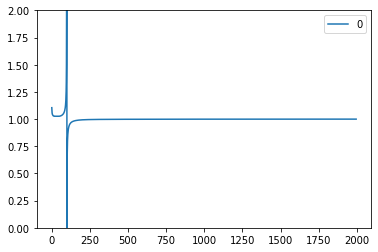

In [16]:
%%time
mat = gen_sym_psd(100, 13, 50)
projection, errors = nearest_corr(
    mat, 'grad', ERR_MAX, ITE_MAX)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [17]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = nearest_corr(
    mat, 'grad', ERR_MAX, ITE_MAX)

18.7 s ± 1.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# ADMM for the primal

CPU times: user 122 ms, sys: 527 ms, total: 649 ms
Wall time: 41.7 ms


<AxesSubplot:>

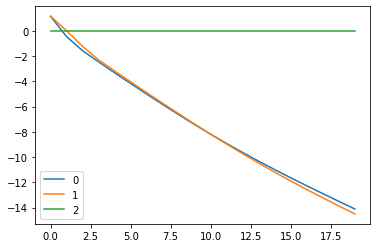

In [18]:
%%time
projection, errors = nearest_corr(
    laplace, 'admm_v0', ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 25.9 s, sys: 1min 50s, total: 2min 15s
Wall time: 8.58 s


(0.0, 2.0)

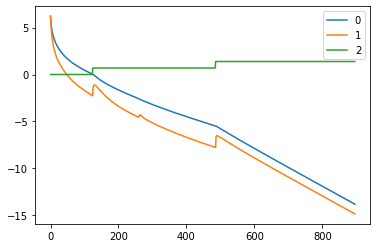

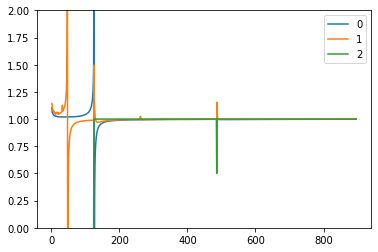

In [19]:
%%time
mat = gen_sym_psd(100, 15, 50)
projection, errors = nearest_corr(
    mat, 'admm_v0', ERR_MAX, ITE_MAX)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [20]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = nearest_corr(
    mat, 'admm_v0', ERR_MAX, ITE_MAX)

9.21 s ± 691 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


CPU times: user 109 ms, sys: 526 ms, total: 635 ms
Wall time: 40.3 ms


<AxesSubplot:>

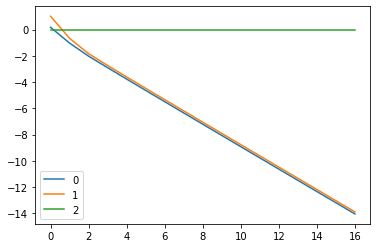

In [21]:
%%time
projection, errors = nearest_corr(
    laplace, 'admm_v1', ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 33.7 s, sys: 2min 22s, total: 2min 56s
Wall time: 11.1 s


(0.0, 2.0)

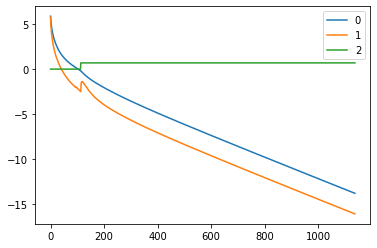

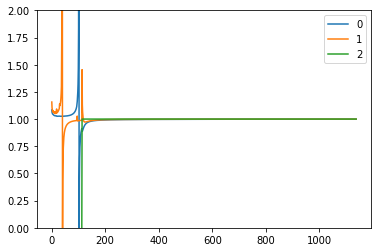

In [22]:
%%time
mat = gen_sym_psd(100, 16, 50)
projection, errors = nearest_corr(
    mat, 'admm_v1', ERR_MAX, ITE_MAX)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [23]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = nearest_corr(
    mat, 'admm_v1', ERR_MAX, ITE_MAX)

9.56 s ± 892 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
ITE_MAX = 1000

# BFGS for the dual

CPU times: user 187 ms, sys: 897 ms, total: 1.08 s
Wall time: 73.7 ms


<AxesSubplot:>

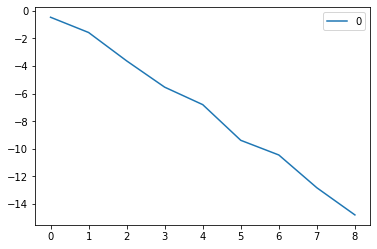

In [25]:
%%time
projection, errors = nearest_corr(laplace, 'bfgs', ERR_MAX, ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 3.63 s, sys: 15 s, total: 18.6 s
Wall time: 1.18 s


(0.0, 2.0)

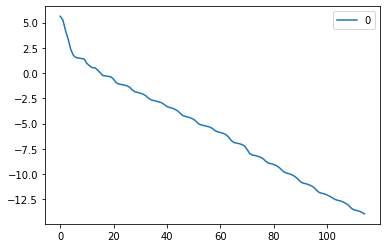

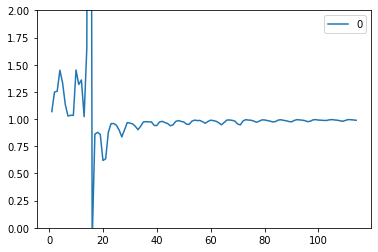

In [26]:
%%time
mat = gen_sym_psd(100, 17, 50)
projection, errors = nearest_corr(mat, 'bfgs', ERR_MAX, ITE_MAX)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [27]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = nearest_corr(mat, 'bfgs', ERR_MAX, ITE_MAX)

1.15 s ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# L-BFGS for the dual

CPU times: user 95 ms, sys: 479 ms, total: 574 ms
Wall time: 36.5 ms


<AxesSubplot:>

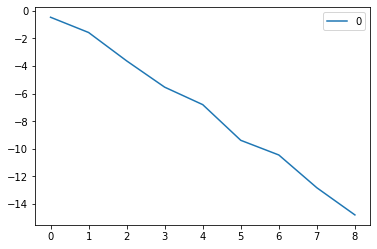

In [28]:
%%time
projection, errors = nearest_corr(
    laplace, 'l_bfgs', ERR_MAX, ITE_MAX, memory=10)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 3.82 s, sys: 16.6 s, total: 20.4 s
Wall time: 1.29 s


(0.0, 2.0)

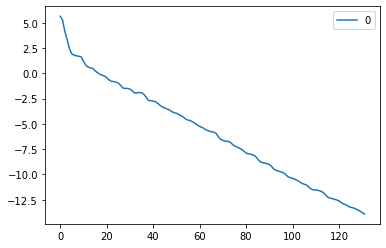

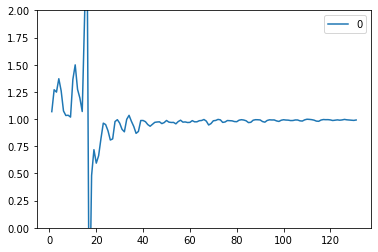

In [29]:
%%time
mat = gen_sym_psd(100, 18, 50)
projection, errors = nearest_corr(
    mat, 'l_bfgs', ERR_MAX, ITE_MAX, memory=10)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [30]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = nearest_corr(
    mat, 'l_bfgs', ERR_MAX, ITE_MAX, memory=10)

1.33 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Newton for the dual

CPU times: user 121 ms, sys: 511 ms, total: 633 ms
Wall time: 40.3 ms


<AxesSubplot:>

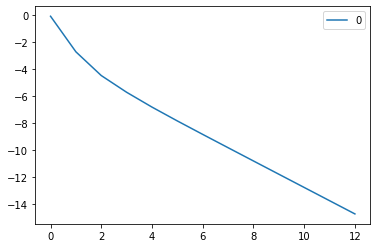

In [31]:
%%time
projection, errors = nearest_corr(laplace, 'newton', ERR_MAX , ITE_MAX)
pd.DataFrame(errors).apply(np.log).plot()

CPU times: user 51.8 s, sys: 2min 49s, total: 3min 40s
Wall time: 26.5 s


(0.0, 2.0)

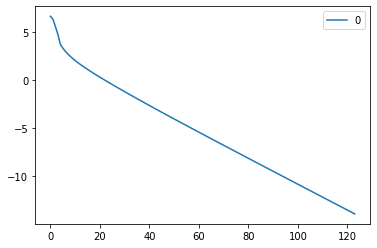

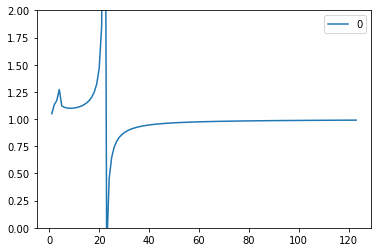

In [32]:
%%time
mat = gen_sym_psd(100, 19, 50)
projection, errors = nearest_corr(mat, 'newton', ERR_MAX, ITE_MAX)
log_errs = pd.DataFrame(errors).apply(np.log)
log_errs.plot()
axis = (log_errs.shift() / log_errs).plot()
axis.set_ylim(0, 2)

In [33]:
%%timeit
mat = gen_sym_psd(100, None, 50)
projection, errors = nearest_corr(mat, 'newton', ERR_MAX, ITE_MAX)

27.6 s ± 1.74 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
